## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, 
                            activation='softmax',
                            name='output')(x)
    model = keras.models.Model(inputs=[input_layer], 
                              outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
Learning_rate = 1e-3
Epochs = 50
Batch_size = 1024
Momentum = 0.95

In [20]:
from keras.callbacks import ModelCheckpoint

model_ckpt = ModelCheckpoint(filepath='./tmp.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             save_weights_only=True)

In [21]:
results = {}

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=Learning_rate,
                                 nesterov=True,
                                 momentum=Momentum)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=Epochs,
          batch_size=Batch_size,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[model_ckpt]
         )

train_loss = model.history.history['loss']
valid_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
valid_acc = model.history.history['val_accuracy']

model.save('final_model.h5')
model.save_weights('model.weights.h5')


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,740,938
Trainable params: 1,739,914
Non-trainable params: 1,024
_____________________________________________

In [30]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

new_model = build_mlp(input_shape=x_train.shape[1:])
new_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
new_model.load_weights('model.weights.h5')
loss_loadback, acc_loadback = new_model.evaluate(x_test, y_test)

print('New test loss:', new_score[0])
print('New test accuracy:', new_score[1]) #同樣的參數，一樣的結果

313/313 [==============================] - 1s 4ms/step - loss: 2.2266 - accuracy: 0.4694
Test loss: 2.2266390323638916
Test accuracy: 0.46939998865127563
313/313 [==============================] - 1s 3ms/step - loss: 2.2266 - accuracy: 0.4694
New test loss: 2.2266390323638916
New test accuracy: 0.46939998865127563


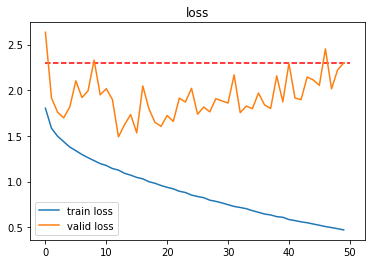

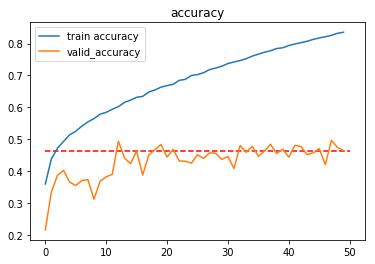

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

plt.plot(range(len(train_loss)), train_loss, label='train loss')
plt.plot(range(len(valid_loss)), valid_loss, label='valid loss')
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title('loss')
plt.show()

plt.plot(range(len(train_acc)), train_acc, label='train accuracy')
plt.plot(range(len(valid_acc)), valid_acc, label='valid_accuracy')
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_acc), colors='r', linestyles='--')
plt.legend()
plt.title('accuracy')
plt.show()

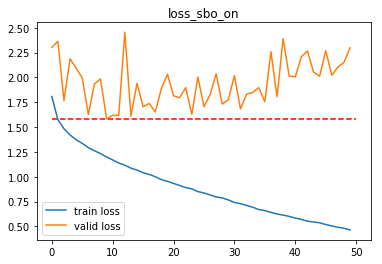

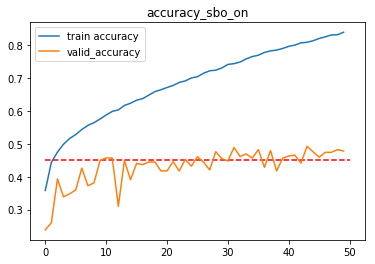

In [18]:
plt.plot(range(len(train_loss)), train_loss, label='train loss')
plt.plot(range(len(valid_loss)), valid_loss, label='valid loss')
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title('loss_sbo_on')
plt.show()

plt.plot(range(len(train_acc)), train_acc, label='train accuracy')
plt.plot(range(len(valid_acc)), valid_acc, label='valid_accuracy')
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_acc), colors='r', linestyles='--')
plt.legend()
plt.title('accuracy_sbo_on')
plt.show()

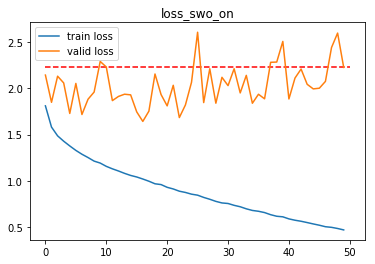

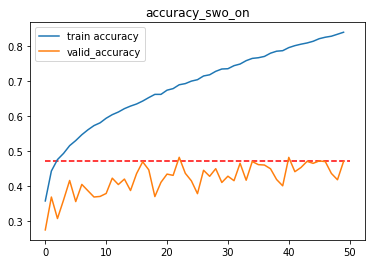

In [31]:
plt.plot(range(len(train_loss)), train_loss, label='train loss')
plt.plot(range(len(valid_loss)), valid_loss, label='valid loss')
plt.hlines(y=loss_loadback, xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.legend()
plt.title('loss_swo_on')
plt.show()

plt.plot(range(len(train_acc)), train_acc, label='train accuracy')
plt.plot(range(len(valid_acc)), valid_acc, label='valid_accuracy')
plt.hlines(y=acc_loadback, xmin=0, xmax=len(train_acc), colors='r', linestyles='--')
plt.legend()
plt.title('accuracy_swo_on')
plt.show()

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
'''model.save_weights和model.save（）的区别

save()保存的模型结果，它既保持了模型的图结构，又保存了模型的参数。

save_weights()保存的模型结果，它只保存了模型的参数，但并没有保存模型的图结构。

由save()保存下来的h5文件才可以直接通过load_model()打开！

save_weights()保存的模型不含有模型结构信息，所以我们需要把模型结构再描述一遍才可以加载

keras保存模型时，使用的是m.save_weights，只保存了模型的权重而没有结构，直接使用keras.models.load_model就会报错。
————————————————
版权声明：本文为CSDN博主「开心果汁」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/u013421629/java/article/details/102844555
'''